# Titanic - Machine Learning from Disaster

## 0. Overview of the data
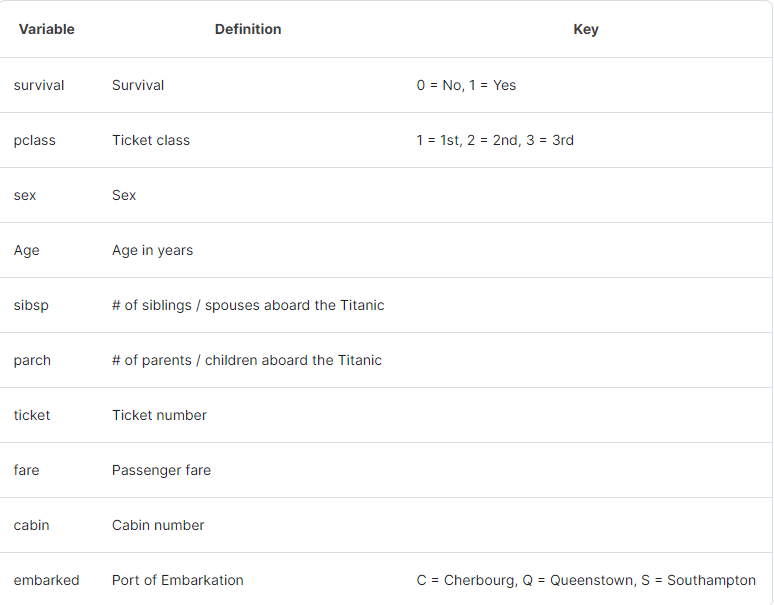  

Target : survival  

## 1. Import 및 데이터 불러오기

In [401]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [402]:
df_train = pd.read_csv('train.csv', index_col=0)
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [403]:
df_train.shape # 891번째 PassengerID까지 있음 확인

(891, 11)

In [404]:
df_test = pd.read_csv('test.csv', index_col=0) # Survived가 target이므로 없음
df_test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [405]:
df_test.shape # 892에서부터 418개의 PassengerID에 대한 정보

(418, 10)

In [406]:
# Train과 test가 PassengerID를 기준으로 나눠졌음을 파악, 둘을 concat하여 전처리를 한번에 쉽게 할 수 있도록 처리, 추후 다시 나눌 예정
df_train_survived = df_train[['Survived']]
df_train_drop_Survived = df_train.drop(columns='Survived')
df = pd.concat([df_train_drop_Survived, df_test])
df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [407]:
df_train_survived = df_train_survived.reset_index().drop(columns='PassengerId')
df_train_survived

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


## 2. 데이터 전처리

### 필요가 없을 것을 예상되는 feature drop
- Name, Ticket, Fare, Cabin -> drop

In [408]:
df.drop(columns=['Name', 'Ticket', 'Fare', "Cabin"], inplace=True)
df

,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,
1,3,male,22.0,1,0,S
2,1,female,38.0,1,0,C
3,3,female,26.0,0,0,S
4,1,female,35.0,1,0,S
5,3,male,35.0,0,0,S
...,...,...,...,...,...,...
1305,3,male,NaN,0,0,S
1306,1,female,39.0,0,0,C
1307,3,male,38.5,0,0,S


여기서 문제는 Embarked가 유의미한 feature일지 아닐지이다. 과연 기항지가 의미가 있을까? 우선 기항지를 하나의 Categorical feature로 보고 모델링을 진행.

### Categorical data one-hot encoding

In [409]:
df_cat = df[['Pclass', 'Sex', 'Embarked']]
df_cat['Pclass'] = df_cat['Pclass'].apply(str) # Pclass는 int 타입이므로 str로 변경하여 one-hot encoding 진행

C:\Users\rayhw\AppData\Local\Temp\ipykernel_9076\3616901751.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['Pclass'] = df_cat['Pclass'].apply(str) # Pclass는 int 타입이므로 str로 변경하여 one-hot encoding 진행


In [410]:
df_cat = pd.get_dummies(df_cat)
df_cat

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
1,0,0,1,0,1,0,0,1
2,1,0,0,1,0,1,0,0
3,0,0,1,1,0,0,0,1
4,1,0,0,1,0,0,0,1
5,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...
1305,0,0,1,0,1,0,0,1
1306,1,0,0,1,0,1,0,0
1307,0,0,1,0,1,0,0,1


In [411]:
df.drop(columns=['Pclass', 'Sex', 'Embarked'], inplace=True)
df = pd.concat([df, df_cat], axis=1)
df

,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,22.0,1,0,0,0,1,0,1,0,0,1
2,38.0,1,0,1,0,0,1,0,1,0,0
3,26.0,0,0,0,0,1,1,0,0,0,1
4,35.0,1,0,1,0,0,1,0,0,0,1
5,35.0,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,0,0,0,0,1,0,1,0,0,1
1306,39.0,0,0,1,0,0,1,0,1,0,0
1307,38.5,0,0,0,0,1,0,1,0,0,1


### 결측치 확인

In [412]:
df.isna().sum()

Age           263
SibSp           0
Parch           0
Pclass_1        0
Pclass_2        0
Pclass_3        0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

Age에 결측치 존재 : KNN Imputer을 활용하여 결측치 채워넣기

In [413]:
# Age에 KNN Imputer 적용, 이때 n_neighbors에 대한 tuning을 할 수 없으므로 default 사용
from sklearn.impute import KNNImputer

imputer = KNNImputer()
df_filled = imputer.fit_transform(df)
df = pd.DataFrame(df_filled, columns=df.columns) # 채워진 것 확인
df

,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,38.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,26.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,35.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,35.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,30.8,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1305,39.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1306,38.5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1307,30.8,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


### 다시 Train, Test 나눠놓기

In [414]:
train = df.loc[:890]
test = df.loc[892:]

In [415]:
train

,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,38.000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,26.000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,35.000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,35.000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,27.000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
887,19.000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
888,20.034,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
889,26.000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [416]:
# Survived 붙여주기, PassengerId drop하기
train = pd.concat([train, df_train_survived], axis=1)
train

,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,22.000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0
1,38.000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
2,26.000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1
3,35.000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
4,35.000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0
887,19.000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
888,20.034,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0
889,26.000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1


In [417]:
# Test도 동일하게 PassengerId drop
test

,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
892,47.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
893,62.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
894,27.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
895,22.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
896,14.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,30.8,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1305,39.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1306,38.5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1307,30.8,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


## 3. 모델링

## Train-test split

In [418]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

X = train.loc[:, [col for col in train.columns if col != 'Survived']]
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## LogisticRegression

#### Simple train-test split

In [423]:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression(max_iter=10000)
model_logistic.fit(X_train, y_train)
y_pred = model_logistic.predict(X_test)

model_logistic.score(X_test, y_test)

0.7988826815642458

#### Using cross-fold validation

In [426]:
accuracy = cross_val_score(model_logistic, X, y, cv=10, scoring='accuracy').mean()
log_loss = cross_val_score(model_logistic, X, y, cv=10, scoring='neg_log_loss').mean()
scores_auc = cross_val_score(model_logistic, X, y, cv=10, scoring='roc_auc').mean()

print('Accuracy: ', accuracy)
print('Log-loss: ', log_loss)
print('AUC score: ', scores_auc)

Accuracy:  0.8069662921348314
Log-loss:  -0.44639014607922645
AUC score:  0.8582161389808448
